In [1]:
#Time series DM implementation by 248356A

#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sanjeewa_10133\AppData\Local\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#importing data file
df_train = pd.read_csv("C:/Users/sanjeewa_10133/Documents/Python Scripts/ADM/Accidental_Drug_Related_Deaths_2012-2022 - Accidental_Drug_Related_Deaths_2012-2022.csv")

In [3]:
df_train.head()

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,05/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,06/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,03/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,01/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"


In [5]:
eda_train = df_train.copy()
eda_train

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,05/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,06/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,03/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,01/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10649,08/15/2022,Date of death,60.0,Male,White,NaN,SOUTHINGTON,HARTFORD,CT,SOUTHINGTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SOUTHINGTON, CT\n(41.600220000000036, -72.8781...","SOUTHINGTON, CT\n(41.600220000000036, -72.8781...","CT\n(41.57350273000003, -72.73830590799997)"
10650,01/30/2022,Date of death,65.0,Male,White,NaN,HARTFORD,HARTFORD,CT,HARTFORD,...,NaN,Y,NaN,y,Buprenorphine,Y,Buprenorphine,"HARTFORD, CT\n(41.76376000000005, -72.67397999...","HARTFORD, CT\n(41.76376000000005, -72.67397999...","CT\n(41.57350273000003, -72.73830590799997)"
10651,09/17/2022,Date of death,41.0,Male,Black or African American,NaN,HARTFORD,HARTFORD,CT,HARTFORD,...,Y,NaN,NaN,NaN,NaN,Y,NaN,"HARTFORD, CT\n(41.76376000000005, -72.67397999...","HARTFORD, CT\n(41.76376000000005, -72.67397999...","CT\n(41.57350273000003, -72.73830590799997)"
10652,12/20/2022,Date of death,59.0,Male,White,NaN,CHESHIRE,NEW HAVEN,CT,CHESHIRE,...,Y,NaN,NaN,NaN,NaN,Y,NaN,"CHESHIRE, CT\n(41.511690000000044, -72.8991099...","CHESHIRE, CT\n(41.511690000000044, -72.8991099...","CT\n(41.57350273000003, -72.73830590799997)"


In [7]:
eda_train['Death State'] = 1

In [8]:
#date and time separation
eda_train['Date'] = pd.to_datetime(eda_train['Date'])

daily_deaths=eda_train.resample('D', on='Date')['Death State'].sum().to_frame()
weekly_deaths=eda_train.resample('W', on='Date')['Death State'].sum().to_frame()
monthly_deaths=eda_train.resample('M', on='Date')['Death State'].sum().to_frame()

C:\Users\sanjeewa_10133\AppData\Local\Temp\1\ipykernel_11084\2527381027.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_deaths=eda_train.resample('M', on='Date')['Death State'].sum().to_frame()


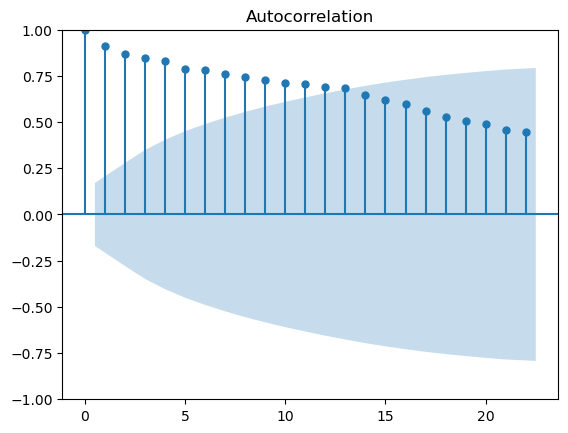

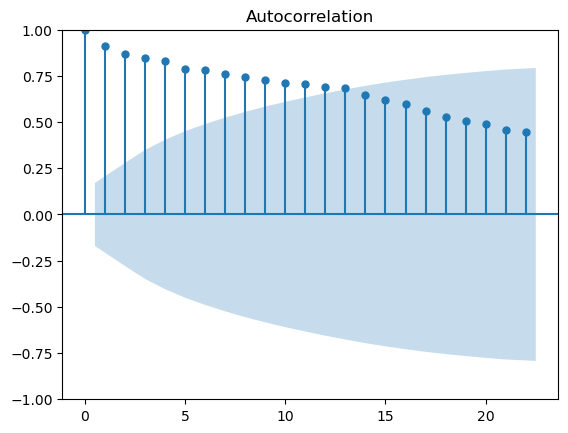

In [9]:
#Calculating autocorrelation of total deaths
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(monthly_deaths)

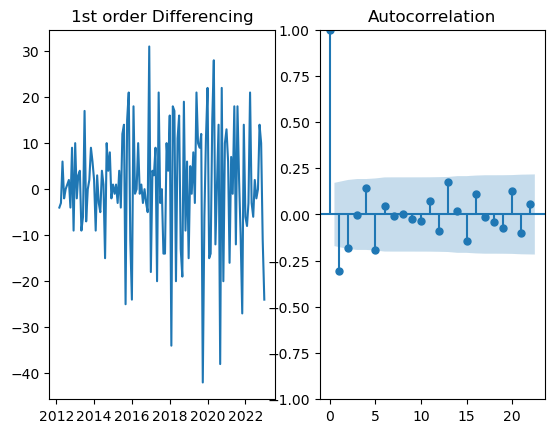

In [10]:
#calculating 1st order differencing and auto correlation
f=plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st order Differencing')
ax1.plot(monthly_deaths.diff())

ax2 = f.add_subplot(122)
plot_acf(monthly_deaths.diff().dropna(), ax=ax2)
plt.show()

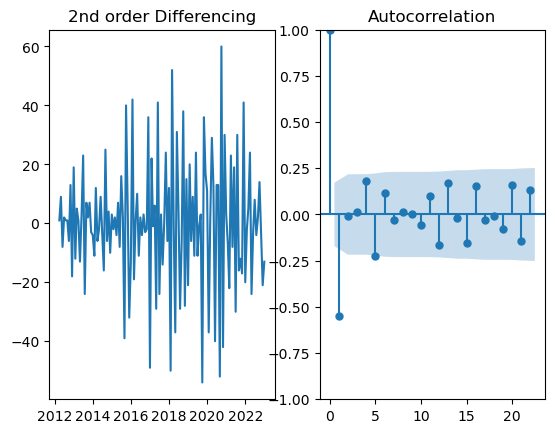

In [11]:
#calculating 2nd order differencing and their auto correlations
f=plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd order Differencing')
ax1.plot(monthly_deaths.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(monthly_deaths.diff().diff().dropna(), ax=ax2)
plt.show()

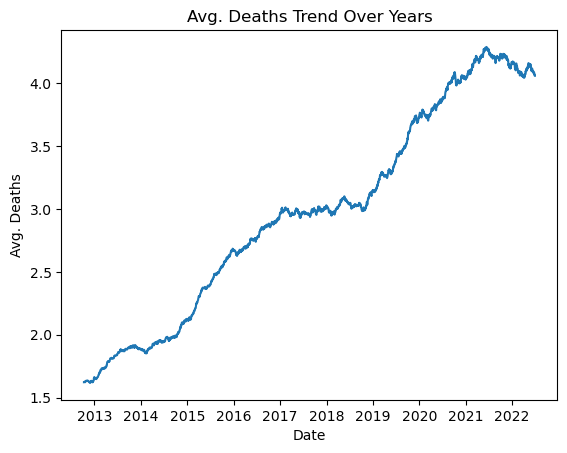

In [12]:
#Calulating movig average for total deaths

trend_deaths=eda_train.groupby('Date')['Death State'].sum()
moving_avg=trend_deaths.rolling(window=365,center=True).mean().reset_index()
moving_avg
plt.plot(moving_avg['Date'], moving_avg['Death State'])
plt.xlabel('Date')
plt.ylabel('Avg. Deaths')
plt.title('Avg. Deaths Trend Over Years')
plt.show()

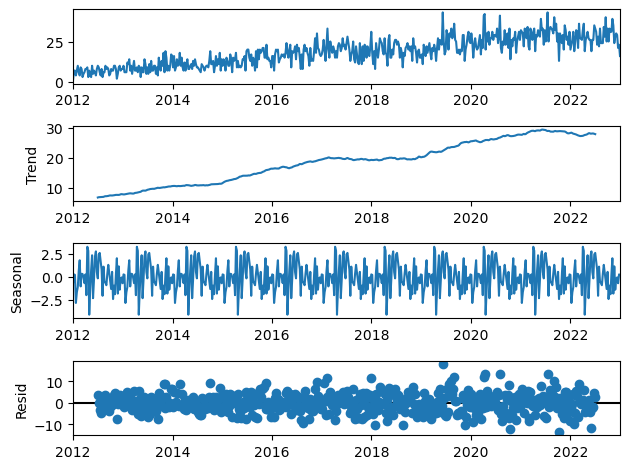

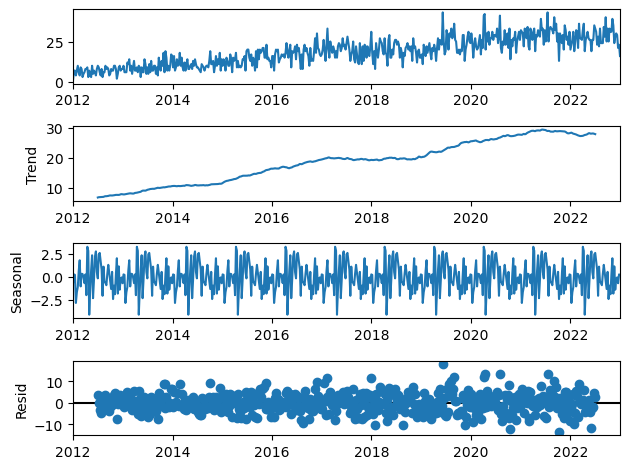

In [13]:
#seasonal decomposing to analyze trend, seasonal components and residues
from statsmodels.tsa.seasonal import seasonal_decompose


decompose_result = seasonal_decompose(weekly_deaths,model="additive")
decompose_result.plot()

In [14]:
#Calculation of adfuller stat
from statsmodels.tsa.stattools import adfuller


result = adfuller(monthly_deaths.dropna())
print ('p-value', result[1])

result = adfuller(monthly_deaths.diff().dropna())
print ('p-value', result[1])

result = adfuller(monthly_deaths.diff().diff().dropna())
print ('p-value', result[1])

p-value 0.6652662161798217
p-value 2.1701021788907344e-07
p-value 1.4250163578352606e-11


In [15]:
#calculation of auto arima to get an idea on order and seasonal order for SARIMAX calculation
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Grid search for seasonal orders
auto_model = auto_arima(monthly_deaths, seasonal=True, m=12)  # Assuming monthly seasonality
order, seasonal_order = auto_model.order, auto_model.seasonal_order

In [16]:
order, seasonal_order

((0, 1, 2), (0, 0, 0, 12))

In [17]:
monthly_deaths

,Death State
Date,
2012-01-31,31
2012-02-29,27
2012-03-31,24
2012-04-30,30
2012-05-31,28
...,...
2022-08-31,118
2022-09-30,132
2022-10-31,142


In [18]:
#SARIMAX model for total monthly deaths and fitting the model
model_sarimax_monthly = SARIMAX(monthly_deaths, order=(0, 1, 2), seasonal_order=(1, 1, 1, 12))
results_monthly = model_sarimax_monthly.fit()

In [19]:
#getting to forecast for 60 more months
forecast_sarimax_monthly = results_monthly.get_forecast(steps=60)
forecast_values_monthly = forecast_sarimax_monthly.predicted_mean

<Axes: xlabel='Date'>

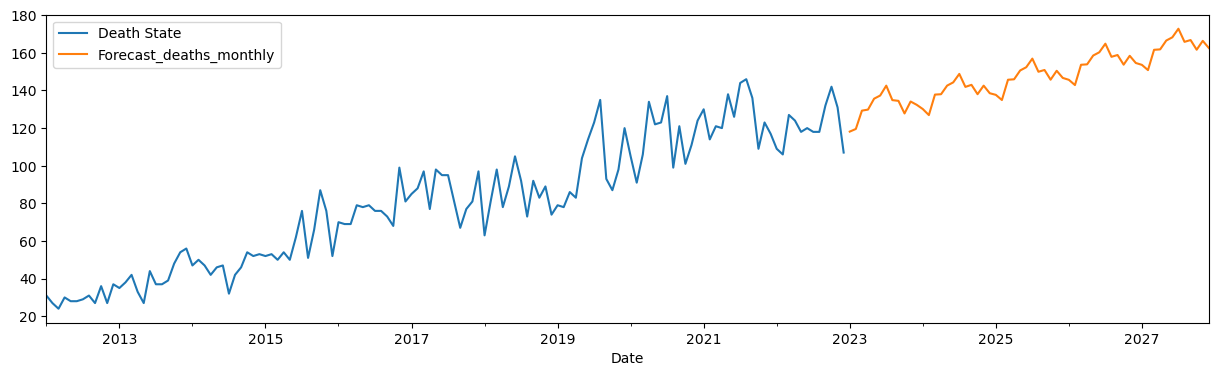

In [20]:
#Plotting SARIMAX model and time series forecasting
monthly_deaths.plot(legend=True, label='Actual_deaths_monthly', figsize=(15,4))

forecast_values_monthly.plot(legend=True, label= 'Forecast_deaths_monthly')